In [1]:
# loading libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Reading Dataset

In [7]:
# reading the annotated dataset
df = pd.read_csv('cre_clean_root_detection.csv')

# Exploratory Data Analysis

In [8]:
#1- Checking Missing Values
missing_data = pd.DataFrame({'total_missing': df.isnull().sum(), 'perc_missing': (df.isnull().sum()/82790)*100})
missing_data

,total_missing,perc_missing
title,0,0.000000
Krumhansl-Shmuckler,0,0.000000
simple weights,0,0.000000
Aarden Essen,0,0.000000
Bellman Budge,0,0.000000
Temperly Kostka Payne,0,0.000000
as transcribed,0,0.000000
final_note,0,0.000000
freq note,1,0.001208
freq weighted acc,1,0.001208


In [9]:
# Handling Missing Values (freq note, freq weighted acc	)
df['freq note'].fillna(df['freq note'].mode()[0], inplace = True)
df['freq weighted acc'].fillna(df['freq weighted acc'].mode()[0], inplace = True)
# finding if there is any null value
df.isnull().sum()

title                    0
Krumhansl-Shmuckler      0
simple weights           0
Aarden Essen             0
Bellman Budge            0
Temperly Kostka Payne    0
as transcribed           0
final_note               0
freq note                0
freq weighted acc        0
certainty                0
root                     0
expert assigned          0
dtype: int64

In [10]:
# Exploring 'expert assigned' variable
df['expert assigned'].value_counts()

2     481
7     415
9     181
4     126
0      14
11      6
5       1
Name: expert assigned, dtype: int64

# Cohen Kappa Score computation

In [11]:
# we dont want to include ('title', 'certainty', 'root') in the analysis, therefore, we want to remove it
newDf = df.drop(['title', 'certainty', 'root'], axis=1)

In [12]:
from sklearn.metrics import cohen_kappa_score
# Calling DataFrame constructor  
arr = []
for item in newDf:
    col = []
    for item2 in newDf:
        col.append(cohen_kappa_score(newDf[item], newDf[item2]))
    arr.append(col)
    
mydf = pd.DataFrame(arr)
mydf = pd.DataFrame(data=mydf.values, columns=newDf.columns)


# Plotting Cohen Kappa Correlation

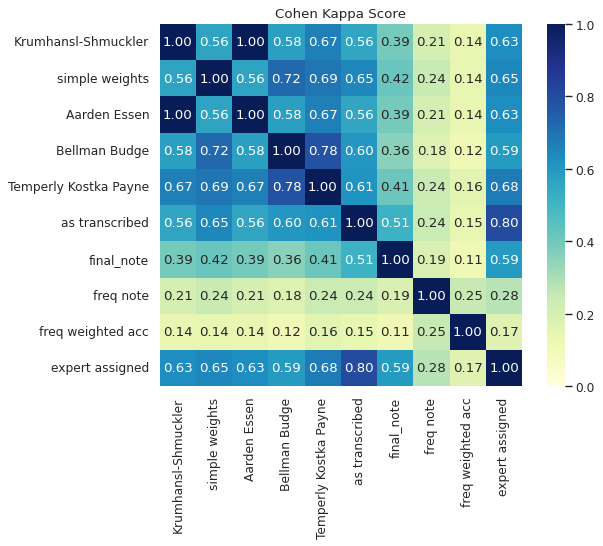

In [13]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

fig = plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.clf()
ax = fig.add_subplot(111)
ax.set_aspect(1)
res = sns.heatmap(mydf.values, annot=True, fmt='.2f', cmap="YlGnBu", vmin=0.0, vmax=1.0)
plt.title('Cohen Kappa Score',fontsize=12)

plt.xticks([i+0.5 for i in range(mydf.values.shape[0])], [str(element) for element in mydf])
plt.xticks(rotation=90)

plt.yticks([i+0.5 for i in range(mydf.values.shape[1])], [str(element) for element in mydf])
plt.yticks(rotation=0)

plt.savefig("Cohen Kappa Correlation.pdf", bbox_inches='tight', dpi=100)
plt.show()

# GLOBAL SETTINGS

In [14]:
#FEATURE VECTOR SETTINGS => This will allow us to add/drop (1/0) certain features for classification 
Krumhansl_Shmuckler = 1 
simple_weights = 1
Aarden_Essen = 1 
Bellman_Budge = 1
Temperly_Kostka_Payne = 1  
as_transcribed = 1 
final_note = 1 
freq_note = 1 
freq_weighted_acc = 1
certainty = 0 # Removing this due to low correlation
root = 0 # this was removed upon Danny's suggetion [Dont know what it is??]

# Defining X (features) and Y (target Class)

In [15]:
#X = df.drop(['expert assigned'], axis=1)  
X = df.drop(['expert assigned', 'title'], axis=1)

if(Krumhansl_Shmuckler !=  1):
    X = X.drop(['Krumhansl-Shmuckler'], axis=1)
if(simple_weights !=  1):
    X = X.drop(['simple weights'], axis=1)
if(Aarden_Essen !=  1):
    X = X.drop(['Aarden Essen'], axis=1)
if(Bellman_Budge !=  1):
    X = X.drop(['Bellman Budge'], axis=1)
if(Temperly_Kostka_Payne !=  1):  
    X = X.drop(['Temperly Kostka Payne'], axis=1)
if(as_transcribed !=  1):
    X = X.drop(['as transcribed'], axis=1)
if(final_note !=  1):
    X = X.drop(['final_note'], axis=1)
if(freq_note !=  1):
    X = X.drop(['freq note'], axis=1)
if(freq_weighted_acc !=  1):
    X = X.drop(['freq weighted acc'], axis=1)
if(certainty !=  1):
    X = X.drop(['certainty'], axis=1)    
if(root !=  1):
    X = X.drop(['root'], axis=1)
    
print("List of features considered: ", X.columns)

y = df['expert assigned']

List of features considered:  Index(['Krumhansl-Shmuckler', 'simple weights', 'Aarden Essen',
       'Bellman Budge', 'Temperly Kostka Payne', 'as transcribed',
       'final_note', 'freq note', 'freq weighted acc'],
      dtype='object')


# Taking 10% of the data out from the original to evluate the performance of the developed model

In [16]:
# split data into training and testing sets
from sklearn.model_selection import train_test_split
ModelDataset_X, EvalationDataset_X, ModelDataset_y, EvalationDataset_y = train_test_split(X, y, test_size = 0.1, random_state = 30)

In [17]:
print(ModelDataset_y.value_counts())

2     441
7     369
9     156
4     115
0      13
11      6
5       1
Name: expert assigned, dtype: int64


In [18]:
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler


In [19]:

# Preparing dataset for Model Creation (It is kind of training dataet)
# first random sampling
oversample = RandomOverSampler(sampling_strategy='minority')
ModelDataset_X_oversample, ModelDataset_y_oversample = oversample.fit_resample(ModelDataset_X, ModelDataset_y)   
print( ModelDataset_y_oversample.value_counts())

2     441
5     441
7     369
9     156
4     115
0      13
11      6
Name: expert assigned, dtype: int64


In [21]:

smt = SMOTE()
ModelDataset_X_smote, ModelDataset_y_smote = smt.fit_resample(ModelDataset_X_oversample, ModelDataset_y_oversample)

print( ModelDataset_y_smote.value_counts())

2     441
7     441
4     441
9     441
0     441
11    441
5     441
Name: expert assigned, dtype: int64


# Preparing Datasets for experimentations

In [22]:

# Preparing dataset for Model Evaluation (It is kind of test dataet)
# first random sampling
oversample = RandomOverSampler(sampling_strategy='minority')
EvalationDataset_X_oversample, EvalationDataset_y_oversample = oversample.fit_resample(EvalationDataset_X, EvalationDataset_y)
    
# Counting Unique values of each class after random sampling
#smt = SMOTE()
EvalationDataset_X_smote, EvalationDataset_y_smote = smt.fit_resample(EvalationDataset_X_oversample, EvalationDataset_y_oversample)


# At this point we have the following datasets

(ModelDataset_X, ModelDataset_y)
(EvalationDataset_X, EvalationDataset_y)

(ModelDataset_X_smote, ModelDataset_y_smote)
(EvalationDataset_X_smote, EvalationDataset_y_smote)

In [23]:

# count unique values of each class
#print("count unique values of each class - ModelDataset_y")
#print(ModelDataset_y.value_counts())
ModelDataset_y_s = ModelDataset_y.value_counts()

#print("count unique values of each class - ModelDataset_y_smote") 
#print(ModelDataset_y_smote.value_counts())
ModelDataset_y_smote_s = ModelDataset_y_smote.value_counts()

#print("count unique values of each class - EvalationDataset_y") 
#print(EvalationDataset_y.value_counts())
EvalationDataset_y_s = EvalationDataset_y.value_counts()

#print("count unique values of each class - EvalationDataset_y_smote") 
#print(EvalationDataset_y_smote.value_counts())
EvalationDataset_y_smote_s = EvalationDataset_y_smote.value_counts()

mydf1 = pd.DataFrame({'note':ModelDataset_y_s.index, 'count':ModelDataset_y_s.values})
mydf2 = pd.DataFrame({'note':ModelDataset_y_smote_s.index, 'count':ModelDataset_y_smote_s.values})
mydf3 = pd.DataFrame({'note':EvalationDataset_y_s.index, 'count':EvalationDataset_y_s.values})
mydf4 = pd.DataFrame({'note':EvalationDataset_y_smote_s.index, 'count':EvalationDataset_y_smote_s.values})

mydf1 = mydf1.convert_dtypes(int)
mydf2 = mydf2.convert_dtypes(int)
mydf3 = mydf3.convert_dtypes(int)
mydf4 = mydf4.convert_dtypes(int)

# Distribution of model and evaluation datasets

In [24]:
mdf = pd.concat([mydf1, mydf2, mydf3, mydf4], axis=1,  keys=('ModelDataset_y','ModelDataset_y_smote', "EvalationDataset_y", "EvalationDataset_y_smote"))
mdf

ModelDataset_y       ModelDataset_y_smote       EvalationDataset_y        \
            note count                 note count               note count   
0              2   441                    2   441                  7    46   
1              7   369                    7   441                  2    40   
2              9   156                    4   441                  9    25   
3              4   115                    9   441                  4    11   
4              0    13                    0   441                  0     1   
5             11     6                   11   441               <NA>  <NA>   
6              5     1                    5   441               <NA>  <NA>   

  EvalationDataset_y_smote        
                      note count  
0                        9    46  
1                        2    46  
2                        7    46  
3                        4    46  
4                        0    46  
5                     <NA>  <NA>  
6                     <NA>  <NA>

# Classification report of state-of-the-art models for root note detection 

In [25]:

print("Classification Report - Krumhansl-Shmuckler")
print(classification_report(EvalationDataset_y, EvalationDataset_X["Krumhansl-Shmuckler"], labels=[0,2,4,7,9]))

print("Classification Report - simple weights")
print(classification_report(EvalationDataset_y, EvalationDataset_X["simple weights"], labels=[0,2,4,7,9]))

print("Classification Report - Aarden Essen")
print(classification_report(EvalationDataset_y, EvalationDataset_X["Aarden Essen"], labels=[0,2,4,7,9]))

print("Classification Report - Bellman Budge")
print(classification_report(EvalationDataset_y, EvalationDataset_X["Bellman Budge"], labels=[0,2,4,7,9]))

print("Classification Report - Temperly Kostka Payne")
print(classification_report(EvalationDataset_y, EvalationDataset_X["Temperly Kostka Payne"], labels=[0,2,4,7,9]))


print("Classification Report - as transcribed")
print(classification_report(EvalationDataset_y, EvalationDataset_X['as transcribed'], labels=[0,2,4,7,9]))


print("Classification Report - 'final_note'")
print(classification_report(EvalationDataset_y, EvalationDataset_X['final_note'], labels=[0,2,4,7,9]))


print("Classification Report - 'freq note'")
print(classification_report(EvalationDataset_y, EvalationDataset_X['freq note'], labels=[0,2,4,7,9]))

print("Classification Report - 'freq weighted acc'")
print(classification_report(EvalationDataset_y, EvalationDataset_X['freq weighted acc'], labels=[0,2,4,7,9]))


Classification Report - Krumhansl-Shmuckler
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           2       0.88      0.88      0.88        40
           4       0.22      0.45      0.29        11
           7       0.93      0.80      0.86        46
           9       0.85      0.44      0.58        25

   micro avg       0.75      0.72      0.73       123
   macro avg       0.57      0.51      0.52       123
weighted avg       0.82      0.72      0.75       123

Classification Report - simple weights
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           2       0.73      0.80      0.76        40
           4       0.67      0.55      0.60        11
           7       0.77      0.89      0.83        46
           9       0.73      0.44      0.55        25

    accuracy                           0.74       123
   macro avg       0.68      0.74      0.68     

# Factorial Design Experimental Setup
**Grid-based hyperparameter tuning for developing the optimized model**

In [26]:
# import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
# import Random Forest classifier
from sklearn.ensemble import RandomForestClassifier
# train a Gaussian Naive Bayes classifier on the training set
from sklearn.naive_bayes import GaussianNB
from sklearn import svm

svm_param_grid = {
             'C': [0.1, 0.5, 1.0],
             'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
             'degree': [2, 3, 5],
             'gamma': ['auto', 'scale'],
             'tol': [1e-5, 1e-3, 1e-2],
             'max_iter': [-1, 5, 10]
}

RandomForest_param_grid = {
    'max_depth': [2, 3, 4, 5, 9, 10, 11,12, 15, 20, 22, 23, 30, 60],
    'max_features': ['auto', 'sqrt', 'log2'],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 25],
    'criterion': ['gini', 'entropy'],
}


DecisionTree_param_grid = {
    'max_depth': [2, 3, 4, 5, 10, 15, 30, 60],
    'max_features': ['auto', 'sqrt', 'log2'],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'criterion': ['gini', 'entropy'],
}

NB_param_grid = {
                'var_smoothing': np.logspace(0,-9, num=100)
                }


model_param = {
  'DecisionTree':{
      'model': DecisionTreeClassifier(),
      'params': DecisionTree_param_grid,
  },
    
  'RandomForest': {
          'model': RandomForestClassifier(),
          'params': RandomForest_param_grid,
    },
    
  'NB': {
          'model': GaussianNB(),
          'params': NB_param_grid,
    },
   
  #'SVM': {
  #         'model':   svm.SVC(),
  #         'params': svm_param_grid,    
  # }    
}

In [27]:
# function to be called for evaluating each model defined above
def getBestModel (X, y):
    results = []
    for model, param in model_param.items():
        clf = GridSearchCV(param['model'], param['params'], cv= 10, scoring='f1_macro')
        clf.fit(X, y.ravel())
        results.append(
                            {
                            'model': param['model'],
                            'best_score': clf.best_score_,
                            'best_params': clf.best_params_,
                            }
                      )
    return results

# The following experimentation should be exectued twice 

1. **with `as transcribe` feature**
1. **without `as transcribe` feature** 

# Factorial Design Experiment - GridSearch - Implementation
# finding best models on orgininal dataset (ModelDataset_X, ModelDataset_y)

In [28]:
from sklearn.model_selection import GridSearchCV
#ModelDataset_X, ModelDataset_y,
#ModelDataset_X_smote, ModelDataset_y_smote,
#EvalationDataset_X, EvalationDataset_y,
#EvalationDataset_X_smote, EvalationDataset_y_smote
results = getBestModel(ModelDataset_X, ModelDataset_y)

print(results)

[{'model': DecisionTreeClassifier(), 'best_score': 0.7672392781839286, 'best_params': {'criterion': 'gini', 'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 3, 'min_samples_split': 8}}, {'model': RandomForestClassifier(), 'best_score': 0.819776565461893, 'best_params': {'criterion': 'entropy', 'max_depth': 23, 'max_features': 'auto', 'min_samples_leaf': 3, 'min_samples_split': 10, 'n_estimators': 6}}, {'model': GaussianNB(), 'best_score': 0.6285816814412338, 'best_params': {'var_smoothing': 2.310129700083158e-07}}]


# loading best models of DecisionTree, RandomForest, and GaussianNB

In [29]:
result1 = pd.DataFrame(results)
result1.sort_values(by='best_score',ascending=False, inplace=True)
result1

,model,best_score,best_params
1,RandomForestClassifier(),0.819777,"{'criterion': 'entropy', 'max_depth': 23, 'max..."
0,DecisionTreeClassifier(),0.767239,"{'criterion': 'gini', 'max_depth': 10, 'max_fe..."
2,GaussianNB(),0.628582,{'var_smoothing': 2.310129700083158e-07}


In [31]:
# the static indices are used based on the above results
bestModel_DecisionTreeClassifier = results[0]['model']
bestModel_RandomForestClassifier = results[1]['model']
bestModel_GaussianNB = results[2]['model']

# Fitting the best models
**priting its classification report for further analysis**

In [32]:
bestModel_DecisionTreeClassifier.fit(ModelDataset_X, ModelDataset_y.ravel())
bestModel_RandomForestClassifier.fit(ModelDataset_X, ModelDataset_y.ravel())
bestModel_GaussianNB.fit(ModelDataset_X, ModelDataset_y.ravel())

print(bestModel_RandomForestClassifier)
print(bestModel_DecisionTreeClassifier)
print(bestModel_GaussianNB)

RandomForestClassifier()
DecisionTreeClassifier()
GaussianNB()


# Best models evaluation on unseen dataset (EvalationDataset_X and EvalationDataset_X_smote)

In [33]:
# apply the model
EvalationDataset_y_pred = bestModel_RandomForestClassifier.predict(EvalationDataset_X)
print(classification_report(EvalationDataset_y, EvalationDataset_y_pred, labels=[0,2,4,7,9]))
EvalationDataset_y_pred = bestModel_RandomForestClassifier.predict(EvalationDataset_X_smote)
print(classification_report(EvalationDataset_y_smote, EvalationDataset_y_pred, labels=[0,2,4,7,9]))


EvalationDataset_y_pred = bestModel_DecisionTreeClassifier.predict(EvalationDataset_X)
print(classification_report(EvalationDataset_y, EvalationDataset_y_pred, labels=[0,2,4,7,9]))
EvalationDataset_y_pred = bestModel_DecisionTreeClassifier.predict(EvalationDataset_X_smote)
print(classification_report(EvalationDataset_y_smote, EvalationDataset_y_pred, labels=[0,2,4,7,9]))

EvalationDataset_y_pred = bestModel_GaussianNB.predict(EvalationDataset_X)
print(classification_report(EvalationDataset_y, EvalationDataset_y_pred, labels=[0,2,4,7,9]))
EvalationDataset_y_pred = bestModel_GaussianNB.predict(EvalationDataset_X_smote)
print(classification_report(EvalationDataset_y_smote, EvalationDataset_y_pred, labels=[0,2,4,7,9]))

              precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           2       0.93      0.95      0.94        40
           4       0.78      0.64      0.70        11
           7       0.90      0.93      0.91        46
           9       0.91      0.84      0.87        25

    accuracy                           0.89       123
   macro avg       0.80      0.87      0.82       123
weighted avg       0.90      0.89      0.89       123

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        46
           2       0.90      0.96      0.93        46
           4       0.95      0.78      0.86        46
           7       0.78      0.93      0.85        46
           9       0.95      0.85      0.90        46

    accuracy                           0.90       230
   macro avg       0.91      0.90      0.90       230
weighted avg       0.91      0.90      0.90       230

              precisio

In [35]:
EvalationDataset_y
print("count unique values of each class - EvalationDataset_y") 
print(EvalationDataset_y.value_counts())


print("count unique values of each class - EvalationDataset_y_smote") 
print(EvalationDataset_y_smote.value_counts())


count unique values of each class - EvalationDataset_y
7    46
2    40
9    25
4    11
0     1
Name: expert assigned, dtype: int64
count unique values of each class - EvalationDataset_y_smote
9    46
2    46
7    46
4    46
0    46
Name: expert assigned, dtype: int64


# Factorial Design Experiment - GridSearch - Implementation
**finding best models on balanced dataset (ModelDataset_X_smote, ModelDataset_y_smote)**

In [36]:
my_results = getBestModel(ModelDataset_X_smote, ModelDataset_y_smote)

In [38]:
print(my_results)

[{'model': DecisionTreeClassifier(), 'best_score': 0.9434796404553942, 'best_params': {'criterion': 'entropy', 'max_depth': 30, 'max_features': 'log2', 'min_samples_leaf': 4, 'min_samples_split': 10}}, {'model': RandomForestClassifier(), 'best_score': 0.9601051432995419, 'best_params': {'criterion': 'entropy', 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 5}}, {'model': GaussianNB(), 'best_score': 0.8604464332636962, 'best_params': {'var_smoothing': 0.0008111308307896872}}]


In [37]:
my_results1 = pd.DataFrame(my_results)
my_results1.sort_values(by='best_score',ascending=False, inplace=True)
my_results1

,model,best_score,best_params
1,"(DecisionTreeClassifier(max_features='auto', r...",0.960105,"{'criterion': 'entropy', 'max_depth': 20, 'max..."
0,DecisionTreeClassifier(),0.943480,"{'criterion': 'entropy', 'max_depth': 30, 'max..."
2,GaussianNB(),0.860446,{'var_smoothing': 0.0008111308307896872}


# Best models based on previous results

In [39]:
bestModel_s_DecisionTreeClassifier = my_results[0]['model']
bestModel_s_RandomForestClassifier = my_results[1]['model']
bestModel_s_GaussianNB = my_results[2]['model']

In [40]:
bestModel_s_DecisionTreeClassifier.fit(ModelDataset_X_smote, ModelDataset_y_smote.ravel())
bestModel_s_RandomForestClassifier.fit(ModelDataset_X_smote, ModelDataset_y_smote.ravel())
bestModel_s_GaussianNB.fit(ModelDataset_X_smote, ModelDataset_y_smote.ravel())

print(bestModel_s_DecisionTreeClassifier)
print(bestModel_s_RandomForestClassifier)
print(bestModel_s_GaussianNB)

DecisionTreeClassifier()
RandomForestClassifier()
GaussianNB()


# Best models evaluation on unseen dataset (EvalationDataset_X and EvalationDataset_X_smote)

In [42]:
print("Randomforest - Classifier")

EvalationDataset_y_pred = bestModel_s_RandomForestClassifier.predict(EvalationDataset_X)
print(classification_report(EvalationDataset_y, EvalationDataset_y_pred, labels=[0,2,4,7,9]))
EvalationDataset_y_pred = bestModel_s_RandomForestClassifier.predict(EvalationDataset_X_smote)
print(classification_report(EvalationDataset_y_smote, EvalationDataset_y_pred, labels=[0,2,4,7,9]))

print("Decision Tree - Classifier")
EvalationDataset_y_pred = bestModel_s_DecisionTreeClassifier.predict(EvalationDataset_X)
print(classification_report(EvalationDataset_y, EvalationDataset_y_pred, labels=[0,2,4,7,9]))
EvalationDataset_y_pred = bestModel_s_DecisionTreeClassifier.predict(EvalationDataset_X_smote)
print(classification_report(EvalationDataset_y_smote, EvalationDataset_y_pred, labels=[0,2,4,7,9]))


print("Naive Bayes - Classifier")
EvalationDataset_y_pred = bestModel_s_GaussianNB.predict(EvalationDataset_X)
print(classification_report(EvalationDataset_y, EvalationDataset_y_pred, labels=[0,2,4,7,9]))
EvalationDataset_y_pred = bestModel_s_GaussianNB.predict(EvalationDataset_X_smote)
print(classification_report(EvalationDataset_y_smote, EvalationDataset_y_pred, labels=[0,2,4,7,9]))

Randomforest - Classifier
              precision    recall  f1-score   support

           0       0.33      1.00      0.50         1
           2       0.93      0.93      0.93        40
           4       0.80      0.73      0.76        11
           7       0.91      0.93      0.92        46
           9       0.96      0.88      0.92        25

    accuracy                           0.90       123
   macro avg       0.79      0.89      0.81       123
weighted avg       0.91      0.90      0.91       123

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        46
           2       0.93      0.89      0.91        46
           4       0.95      0.89      0.92        46
           7       0.88      0.93      0.91        46
           9       0.98      0.93      0.96        46

    accuracy                           0.93       230
   macro avg       0.93      0.93      0.93       230
weighted avg       0.93      0.93      0.93       2